In [48]:
#bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:

# Carregar os dados
df = pd.read_excel("../data/vendas_2024.xlsx")
#print(df)

In [56]:
# Calcular valor total por venda
df['Total'] = df['Preço_Unit'] * df['Quantidade']
print(df['Total'])


0       150
1     10000
2      2250
3       300
4       160
      ...  
95     1800
96      450
97     4000
98    12500
99    10000
Name: Total, Length: 100, dtype: int64


In [54]:
# Converter a data
df['Data_Venda'] = pd.to_datetime(df['Data_Venda'])
df['Ano_Mes'] = df['Data_Venda'].dt.to_period('M')
print(df['Ano_Mes'])

0     2025-01
1     2025-01
2     2025-01
3     2025-05
4     2025-04
       ...   
95    2025-02
96    2025-05
97    2024-12
98    2025-02
99    2024-12
Name: Ano_Mes, Length: 100, dtype: period[M]


In [57]:
# 1. Total de vendas
total_vendas = df['Total'].sum()
print(total_vendas)

277360


In [58]:
# 2. Produto mais vendido (quantidade)
produtos_mais_vendidos = df.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False)
print(produtos_mais_vendidos)

Produto
HD Externo        40
Fone de Ouvido    36
Mouse             36
Tablet            34
Monitor           26
Smartphone        26
Carregador        24
Notebook          24
Webcam            24
Teclado           17
Name: Quantidade, dtype: int64


In [59]:
# 3. Receita por categoria
receita_categoria = df.groupby('Categoria')['Total'].sum()
print(receita_categoria)

Categoria
Acessórios      36960
Eletrônicos    240400
Name: Total, dtype: int64


In [60]:
# 4. Formas de pagamento mais utilizadas
formas_pagamento = df['Forma_Pagamento'].value_counts()
print(formas_pagamento)

Forma_Pagamento
Pix         27
Dinheiro    26
Boleto      24
Cartão      23
Name: count, dtype: int64


In [61]:
# 5. Cidades com mais receita
receita_cidade = df.groupby('Cidade')['Total'].sum().sort_values(ascending=False)
print(receita_cidade)

Cidade
Porto Alegre      46670
Pelotas           42940
São Paulo         37860
Campinas          34810
Santos            27060
Petrópolis        26740
Niterói           18070
Rio de Janeiro    15250
Uberlândia        13460
Contagem           6510
Belo Horizonte     4240
Caxias do Sul      3750
Name: Total, dtype: int64


In [62]:
# 6. Ticket médio
ticket_medio = df['Total'].mean()

print(ticket_medio)

2773.6


In [64]:
# 7. Produtos com menos vendas
produtos_menos_vendidos = df.groupby('Produto')['Quantidade'].sum().sort_values()
print(produtos_menos_vendidos)

Produto
Teclado           17
Carregador        24
Notebook          24
Webcam            24
Monitor           26
Smartphone        26
Tablet            34
Fone de Ouvido    36
Mouse             36
HD Externo        40
Name: Quantidade, dtype: int64


In [65]:
# 8. Receita por mês
receita_mensal = df.groupby('Ano_Mes')['Total'].sum()
print(receita_mensal)

Ano_Mes
2024-12    36800
2025-01    59500
2025-02    72630
2025-03    26070
2025-04    22860
2025-05    33910
2025-06    25590
Freq: M, Name: Total, dtype: int64


In [28]:
# 9. Clientes que mais compraram
clientes_top = df.groupby('Cliente')['Total'].sum().sort_values(ascending=False).head(10)
print(clientes_top)

Cliente
Dra. Giovanna Araújo    14000
Camila Melo             14000
Luna Nunes              12500
Srta. Bianca Fogaça     12500
Leonardo Alves          10500
Fernanda Gonçalves      10500
Sr. Benício Nogueira    10000
Sophia Alves            10000
Pedro Miguel da Rosa    10000
Mirella Pereira         10000
Name: Total, dtype: int64


In [29]:
# 10. Receita por categoria ao longo do tempo
categoria_tempo = df.groupby(['Ano_Mes', 'Categoria'])['Total'].sum().unstack()
print(categoria_tempo)

Categoria  Acessórios  Eletrônicos
Ano_Mes                           
2024-12          4000        32800
2025-01          7600        51900
2025-02          6630        66000
2025-03          5870        20200
2025-04          3360        19500
2025-05          6410        27500
2025-06          3090        22500


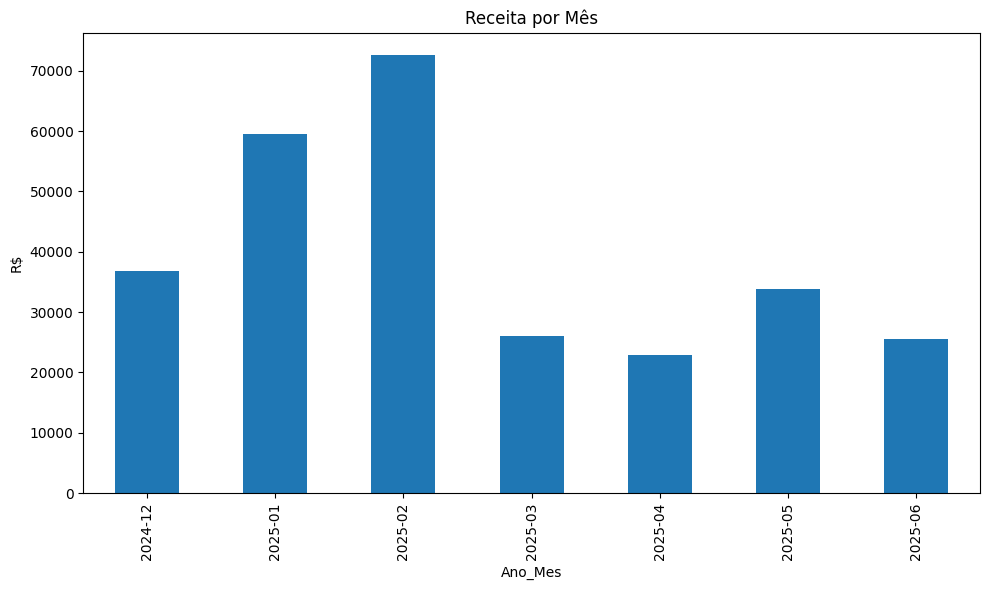

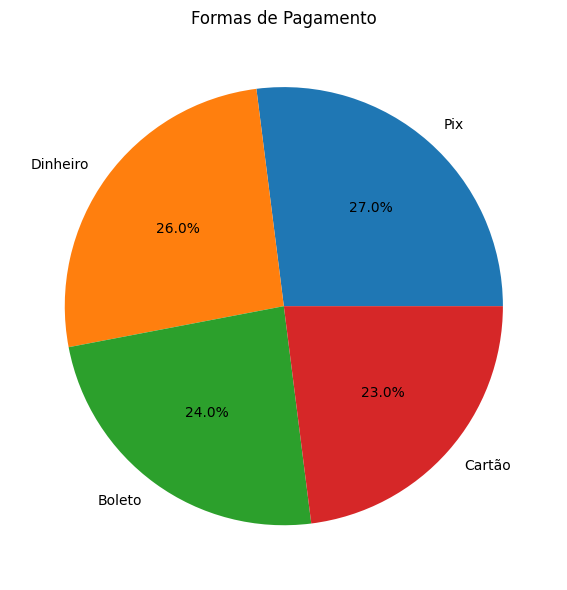

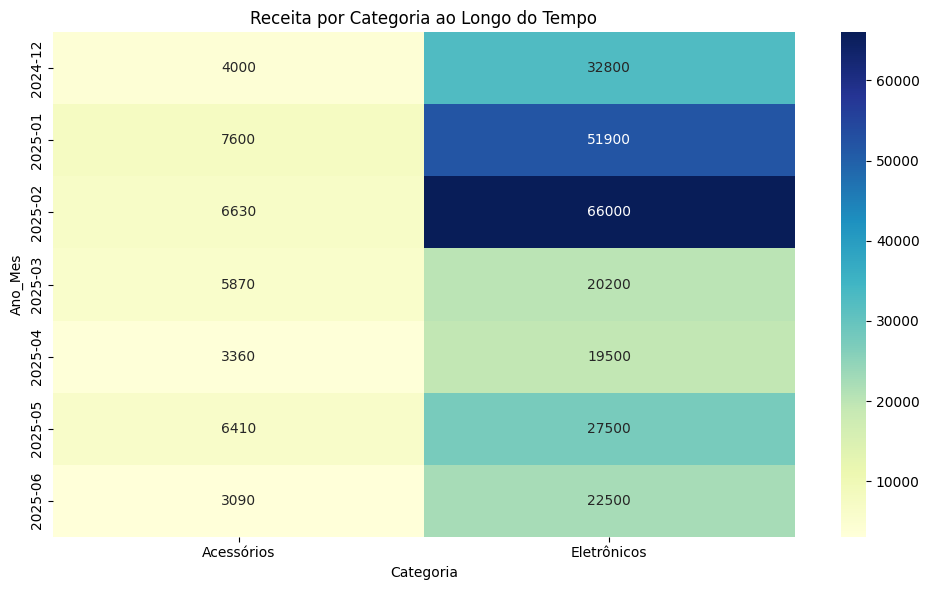

In [32]:
# Gráficos
plt.figure(figsize=(10,6))
receita_mensal.plot(kind='bar', title='Receita por Mês')
plt.ylabel('R$')
plt.tight_layout()
plt.savefig("../imgs/receita_mensal.png")
plt.show()

plt.figure(figsize=(10,6))
formas_pagamento.plot(kind='pie', autopct='%1.1f%%', title='Formas de Pagamento')
plt.ylabel('')
plt.tight_layout()
plt.savefig("../imgs/formas_pagamento.png")
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(categoria_tempo.fillna(0), cmap="YlGnBu", annot=True, fmt=".0f")
plt.title('Receita por Categoria ao Longo do Tempo')
plt.tight_layout()
plt.savefig("../imgs/receita_categoria_tempo.png")
plt.show()